In [1]:
!pip install transformers
!pip install datasets
!pip install seqeval
!pip install accelerate -U
!pip install transformers[torch]
!pip install uvicorn

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.8/547.8 kB 6.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.8/40.8 MB 11.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 15.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.9/64.9 kB 9.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 23.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: reque

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
# Load your data

from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv("/content/drive/MyDrive/train.csv",encoding="utf-8" )
test_data = pd.read_csv("/content/drive/MyDrive/test.csv",encoding="utf-8" )


Mounted at /content/drive


In [4]:
# Convert the tags to unique ids
unique_tags = train_data['Tag'].unique().tolist()
tag2id = {tag: idx for idx, tag in enumerate(unique_tags)}
id2tag = {idx: tag for tag, idx in tag2id.items()}

# Set a fixed sequence length
SEQ_LEN = 75

In [5]:
def create_sequences(data, seq_len=SEQ_LEN):
    words = data['Word'].tolist()
    tags = data['Tag'].tolist()

    sequences = []
    labels = []
    for i in range(0, len(words), seq_len):
        seq_words = words[i:i+seq_len]
        seq_tags = tags[i:i+seq_len]

        if len(seq_words) < seq_len:
            seq_words += ['[PAD]'] * (seq_len - len(seq_words))
            seq_tags += ['O'] * (seq_len - len(seq_tags))

        sequences.append(seq_words)
        labels.append([tag2id[tag] for tag in seq_tags])

    return sequences, labels

In [6]:
train_sequences, train_labels = create_sequences(train_data)
test_sequences, test_labels = create_sequences(test_data)

# Split training data into train and validation sets
train_sequences, val_sequences, train_labels, val_labels = train_test_split(train_sequences, train_labels, test_size=0.2, random_state=42)

In [7]:
# Convert to Hugging Face Dataset format
from datasets import Dataset
from datasets import Dataset, DatasetDict

def create_dataset(sequences, labels):
    return Dataset.from_dict({'tokens': sequences, 'labels': labels})

train_dataset = create_dataset(train_sequences, train_labels)
val_dataset = create_dataset(val_sequences, val_labels)
test_dataset = create_dataset(test_sequences, test_labels)

datasets = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

In [8]:
import torch
from transformers import BertTokenizerFast, BertForTokenClassification, Trainer, TrainingArguments
from datasets import DatasetDict, load_metric

In [9]:
# Load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Tokenize the data
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples['tokens'], truncation=True, padding='max_length', max_length=SEQ_LEN, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples['labels']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        label_ids = [-100 if word_id is None else label[word_id] for word_id in word_ids]
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_datasets = datasets.map(tokenize_and_align_labels, batched=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/268 [00:00<?, ? examples/s]

Map:   0%|          | 0/68 [00:00<?, ? examples/s]

Map:   0%|          | 0/117 [00:00<?, ? examples/s]

In [10]:
# Define the model
model = BertForTokenClassification.from_pretrained('bert-base-uncased', num_labels=len(tag2id))

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=1e-4,
    per_device_train_batch_size=16,    # Adjust batch size as needed,8
    per_device_eval_batch_size=16,     # Adjust batch size as needed,8
    num_train_epochs=10,              # 6
    gradient_accumulation_steps=4,    # Accumulate gradients over 4 steps
    weight_decay=0.01,
    save_total_limit=2,
    logging_dir='./logs',
    logging_steps=10,
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [11]:
# Metric for evaluation
metric = load_metric("seqeval")

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_labels = [[id2tag[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [id2tag[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

<ipython-input-11-9b067080f142>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


The repository for seqeval contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/seqeval.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [12]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
)
torch.cuda.empty_cache()

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: MISC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NUM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ORG seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWar

TrainOutput(global_step=40, training_loss=0.9858852982521057, metrics={'train_runtime': 39.326, 'train_samples_per_second': 68.148, 'train_steps_per_second': 1.017, 'total_flos': 96611845381200.0, 'train_loss': 0.9858852982521057, 'epoch': 9.411764705882353})

[1.3995, 1.1351, 0.7848, 0.6242]
[1.2566890716552734, 1.2669272422790527, 1.2111433744430542, 0.9741493463516235, 0.8667826652526855, 0.8127438426017761, 0.7754905819892883, 0.7419580817222595, 0.7273053526878357, 0.7152470946311951]
[1.2566890716552734, 1.2669272422790527, 1.2111433744430542, 0.9741493463516235, 0.8667826652526855, 0.8127438426017761, 0.7754905819892883, 0.7419580817222595]


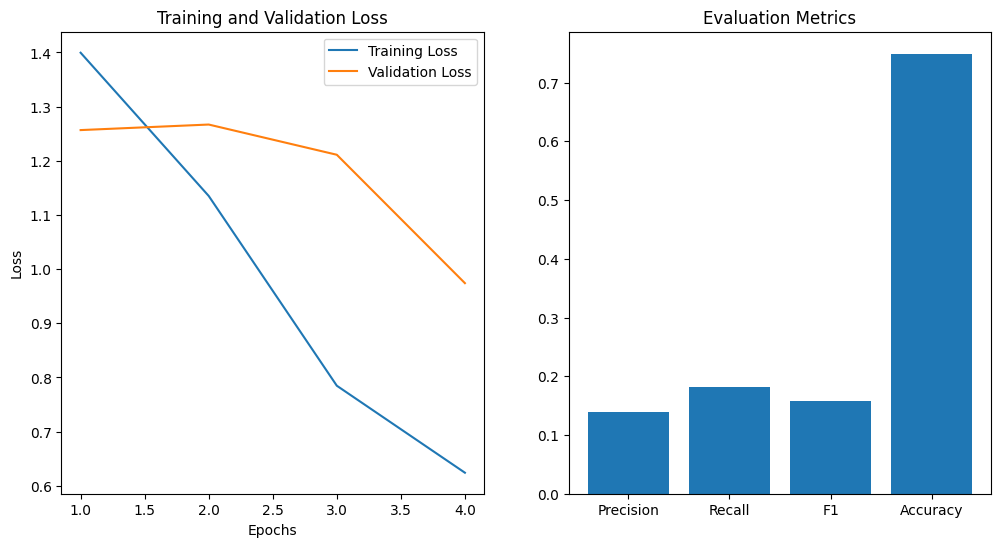

In [14]:
import matplotlib.pyplot as plt

# Plotting training loss and accuracy
history = trainer.state.log_history

train_accuracies = [x['true_label'] for x in history if 'true_label' in x]
val_accuracies = [x['eval_accuracy'] for x in history if 'eval_accuracy' in x]

train_loss = [x['loss'] for x in history if 'loss' in x]
eval_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]

epochs = range(1, len(train_loss) + 1)

print(train_loss)
print(eval_loss)
print(eval_loss[:-2])
# print(train_accuracies)
# print(val_accuracies)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, eval_loss[:-6], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Assuming we have the eval metrics stored from the `trainer.evaluate()` call
eval_results = trainer.evaluate()
plt.subplot(1, 2, 2)
plt.bar(['Precision', 'Recall', 'F1', 'Accuracy'], [eval_results[k] for k in ['eval_precision', 'eval_recall', 'eval_f1', 'eval_accuracy']])
plt.title('Evaluation Metrics')
plt.show()


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: MISC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ORG seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NUM seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LOC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWar

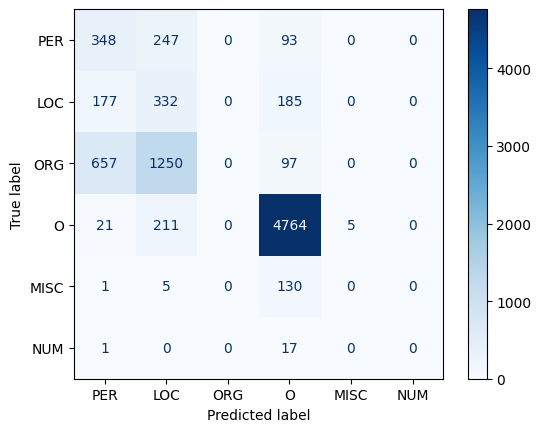

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions, labels, _ = trainer.predict(tokenized_datasets['test'])
predictions = np.argmax(predictions, axis=2)

# Flatten the predictions and labels for confusion matrix
flat_predictions = [p for preds in predictions for p in preds if p != -100]
flat_labels = [l for label in labels for l in label if l != -100]

cm = confusion_matrix(flat_labels, flat_predictions[0:8541], labels=list(tag2id.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(tag2id.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [16]:
print(len(flat_predictions))
print(len(flat_labels))

8775
8541
